In [16]:
import matplotlib.pyplot as plt
import imageio
import numpy as np

In [17]:
plt.rc('figure', figsize=(12,8))

In [18]:
names = [f'{date}_B{i}' for date in ['1993_10_12', '2005_09_11'] for i in range(1, 8)]
len(names)

14

# Linear stretching 

In [19]:
enhanced_images = {}

In [23]:
path = r'data/enhancement/1993_10_12_B4.TIF'
img = imageio.imread(path)

imax, imin = img.max(), img.min()
img2 = (img - imin) / (imax - imin) * 255

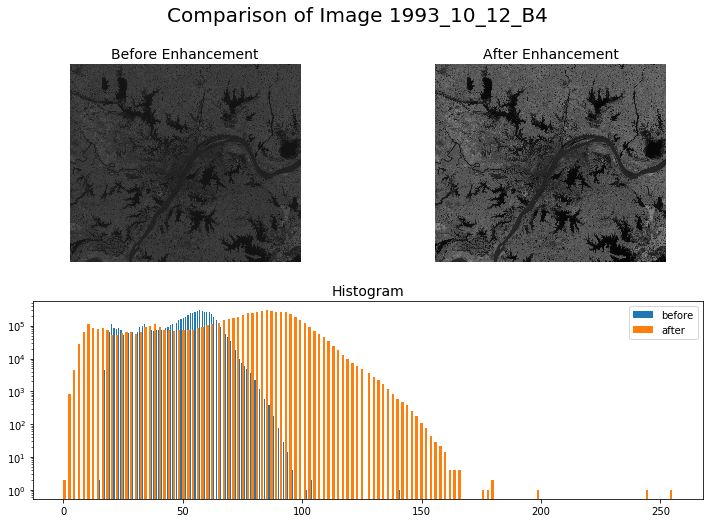

In [27]:
fig = plt.figure()
plt.subplot2grid((2, 2), (0, 0))
plt.axis('off')
plt.title('Before Enhancement', size=14)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)

plt.subplot2grid((2, 2), (0, 1))
plt.axis('off')
plt.title('After Enhancement', size=14)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.subplot2grid((2, 2), (1, 0), colspan=2)
plt.title('Histogram', size=14)
h1 = plt.hist(img.flatten(), bins=256, label='before')
h2 = plt.hist(img2.flatten(), bins=256, label='after')

plt.gca().set_yscale('log')
plt.suptitle(f'Comparison of Image 1993_10_12_B4', size=20)
plt.legend()

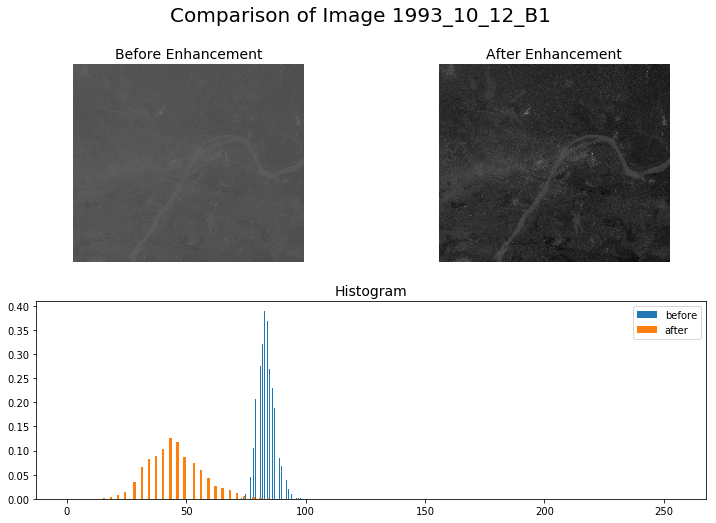

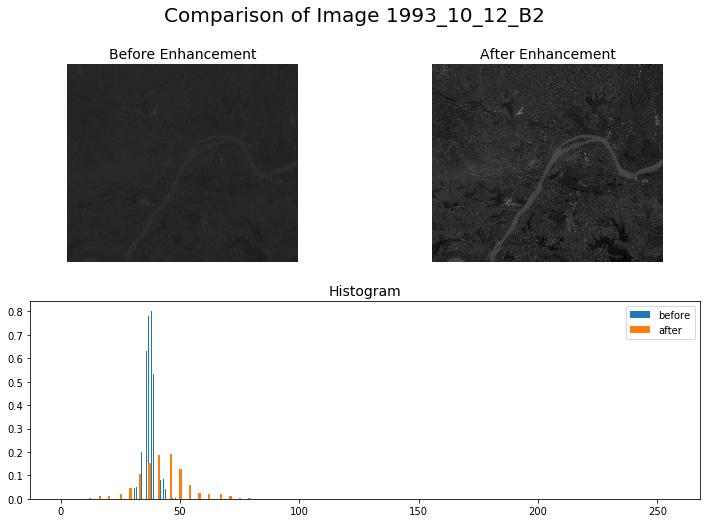

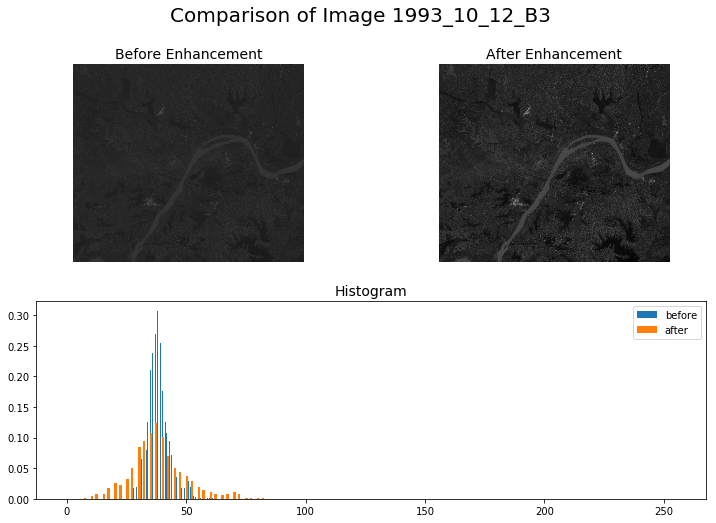

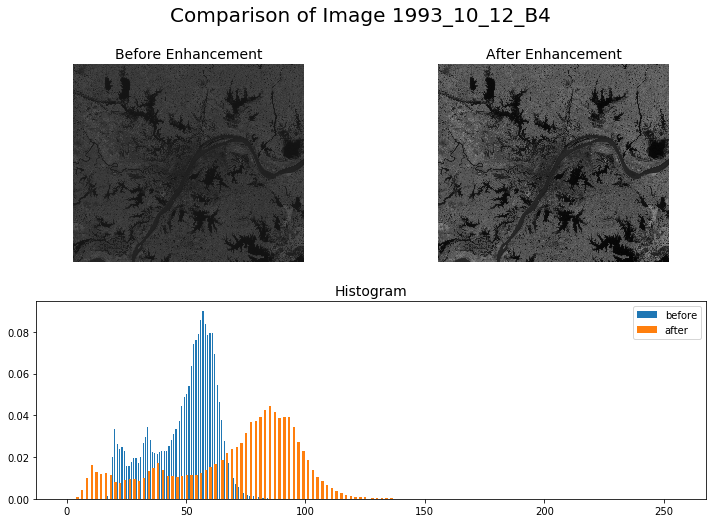

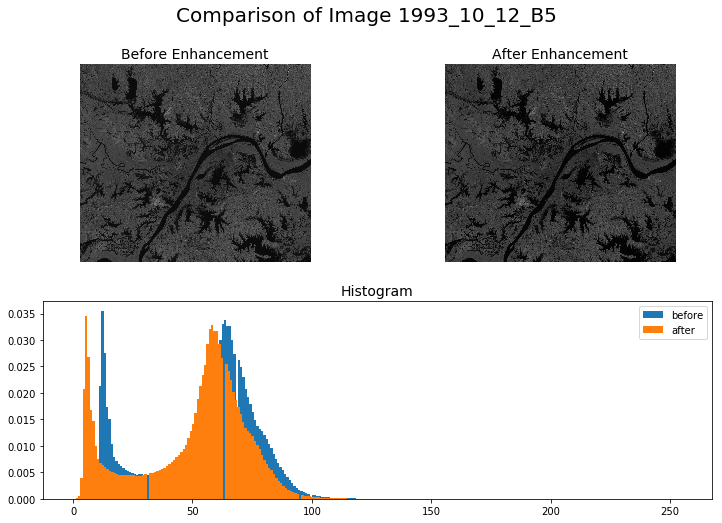

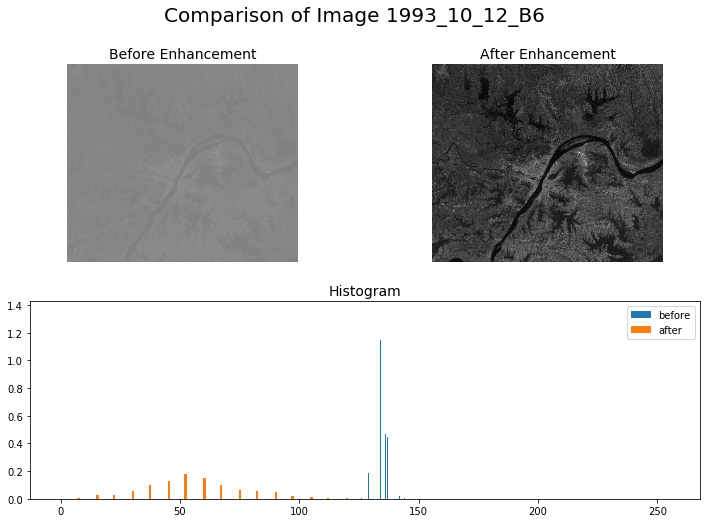

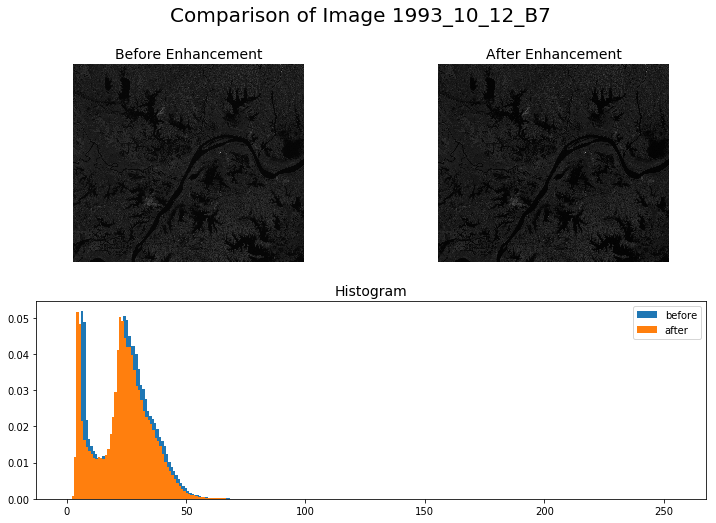

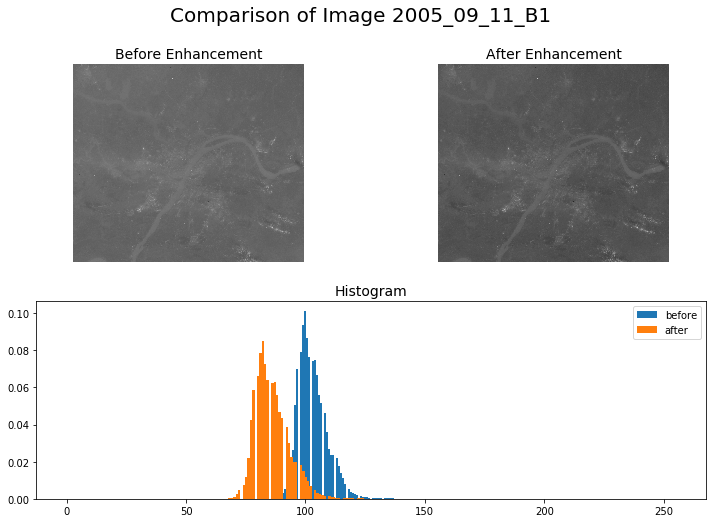

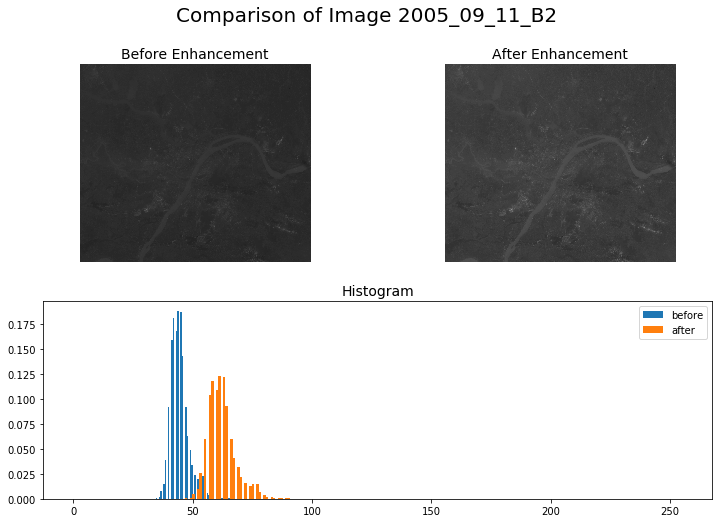

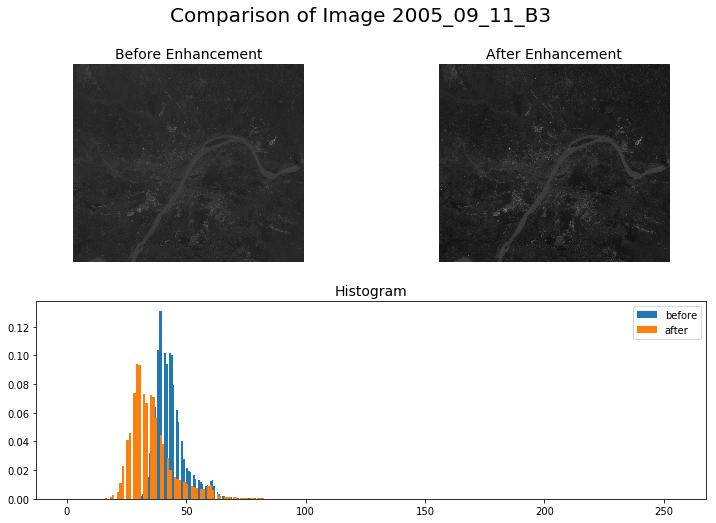

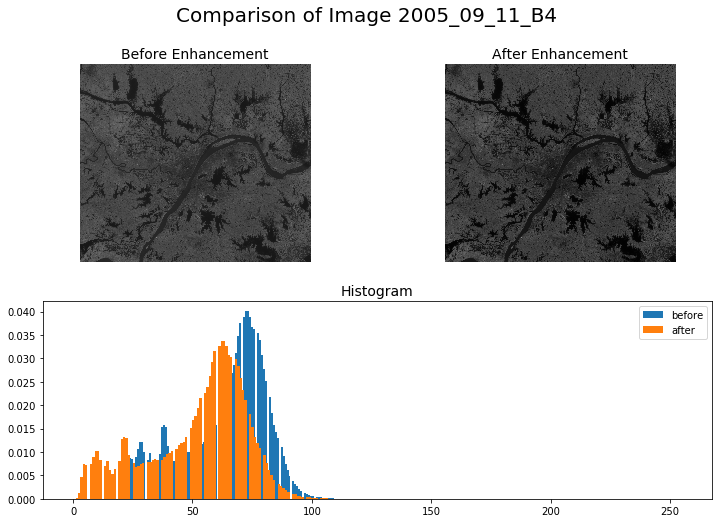

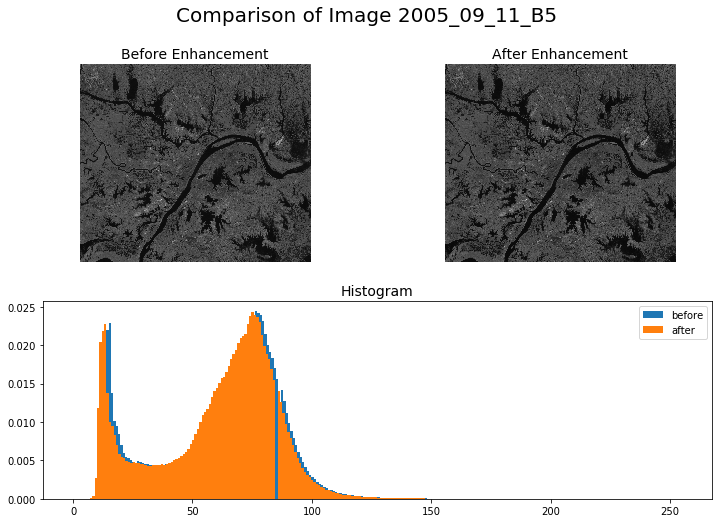

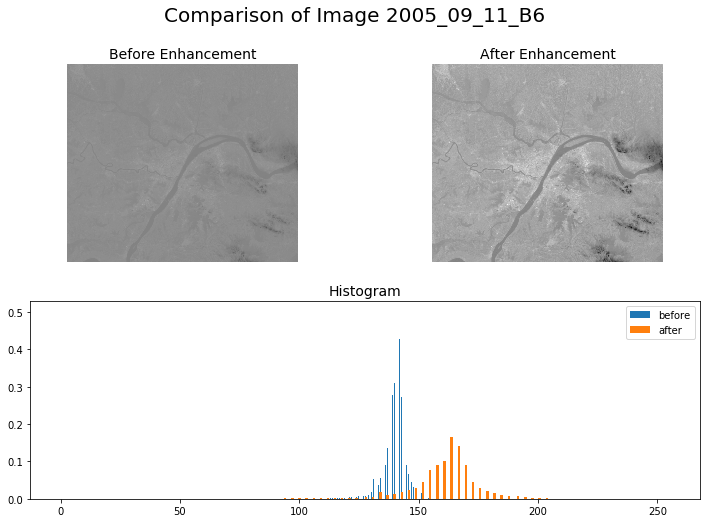

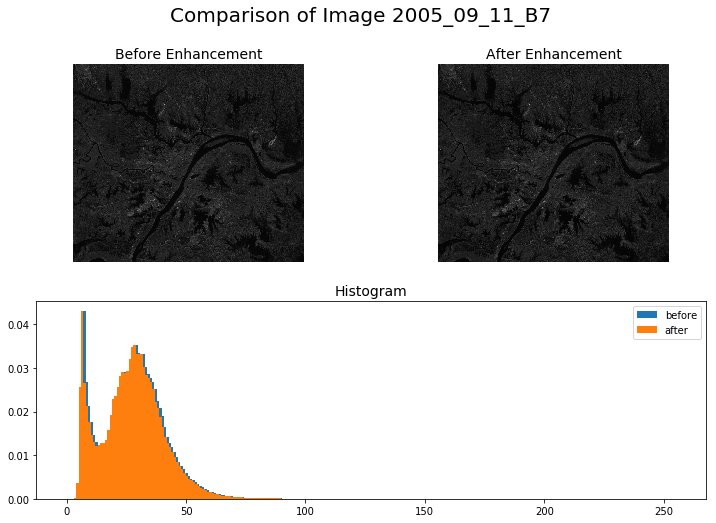

In [28]:
for name in names:
    path = f"data/enhancement/{name}.TIF"
    img = imageio.imread(path)

    imax, imin = img.max(), img.min()
    img2 = (img - imin) / (imax - imin) * 255
    enhanced_images[name] = img2

    fig = plt.figure()
    plt.subplot2grid((2, 2), (0, 0))
    plt.axis('off')
    plt.title('Before Enhancement', size=14)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

    plt.subplot2grid((2, 2), (0, 1))
    plt.axis('off')
    plt.title('After Enhancement', size=14)
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

    plt.subplot2grid((2, 2), (1, 0), colspan=2)
    plt.title('Histogram', size=14)
    h1 = plt.hist(img.flatten(), bins=256, density=True, label='before')
    h2 = plt.hist(img2.flatten(), bins=256, density=True, label='after')


    plt.suptitle(f'Comparison of Image {name}', size=20)
    plt.legend()
    
    plt.savefig(f'output/enhancement/{name}_hist.jpg')
    plt.imsave(f'output/enhancement/{name}_enhanced.jpg', img2, cmap='gray')

# Image Combination

## TM123

In [23]:
img05 = names[-7:]
img05

['2005_09_11_B1',
 '2005_09_11_B2',
 '2005_09_11_B3',
 '2005_09_11_B4',
 '2005_09_11_B5',
 '2005_09_11_B6',
 '2005_09_11_B7']

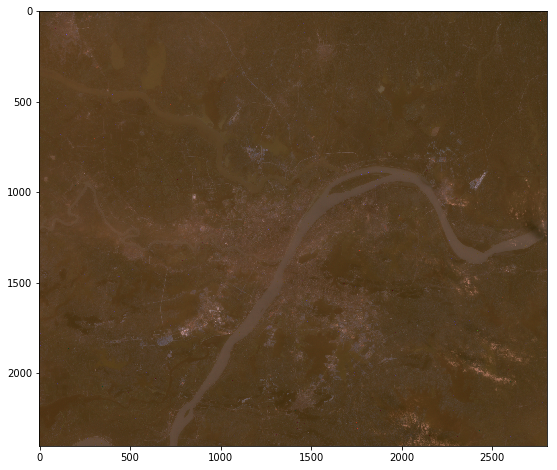

In [37]:
tm1 = enhanced_images[img05[:3][0]]
tm2 = enhanced_images[img05[:3][1]]
tm3 = enhanced_images[img05[:3][2]]

tm123 = np.stack([tm1, tm2, tm3], axis=2).astype('uint8')
plt.imshow(tm123)
plt.imsave('output/enhancement/TM123_2005_09_11.jpg', tm123)

## All combinations

In [45]:
from itertools import permutations

In [46]:
# for i, j, k in permutations(img05, 3):
#     tm1 = enhanced_images[i]
#     tm2 = enhanced_images[j]
#     tm3 = enhanced_images[k]
#     tm123 = np.stack([tm1, tm2, tm3], axis=2).astype('uint8')
#     plt.imsave(f'output/enhancement/combination/TM{i[-1]}{j[-1]}{k[-1]}_2005_09_11.jpg', tm123)

In [47]:
# img93 = names[:7]
# for i, j, k in permutations(img93, 3):
#     tm1 = enhanced_images[i]
#     tm2 = enhanced_images[j]
#     tm3 = enhanced_images[k]
#     tm123 = np.stack([tm1, tm2, tm3], axis=2).astype('uint8')
#     plt.imsave(f'output/enhancement/combination/TM{i[-1]}{j[-1]}{k[-1]}_1993_10_12.jpg', tm123)